Importing the Dependencies

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2   #computer vision for image recognisition
from PIL import Image
import tensorflow as tf
tf.random.set_seed(36)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading MNIST data from keras.datasets

In [11]:
#Already processed data is available in keras datasets MNIST

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 11s 1us/step


In [14]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


Image dimension - > 28 * 28
Gray scale images

8


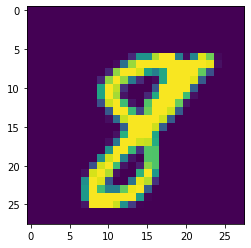

In [20]:
#displaying image
plt.imshow(x_train[55])

#print the corresponding label
print(y_train[55])

In [25]:
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [26]:
#Scaling the values

x_train = x_train/255
x_test = x_test/255

Building the Neural Network

In [27]:
#setting up layers of NN

#We cannot process 28*28 data so flatten them all.
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
                          ])

In [29]:
#Compiling the Neural Network

model.compile(optimizer='Adam',
               loss = 'sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [30]:
#training the neural network

model.fit(x_train,y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 5s 1ms/step - loss: 0.2893 - accuracy: 0.9166
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1374 - accuracy: 0.9590
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1032 - accuracy: 0.9686
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0846 - accuracy: 0.9734
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0701 - accuracy: 0.9781
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0605 - accuracy: 0.9811
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0519 - accuracy: 0.9835
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0469 - accuracy: 0.9843
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0397 - accuracy: 0.9869
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.036

In [33]:
#Test data Accuracy
loss, accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1025 - accuracy: 0.9739


7


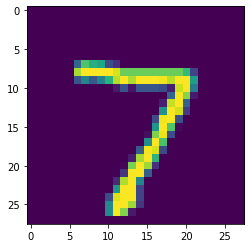

In [37]:
plt.imshow(x_test[0])
print(y_test[0])

In [38]:
y_pred = model.predict(x_test)

313/313 [==============================] - 0s 962us/step


model.predict gives prediction probability of each class for that particular datapoint

In [41]:
print(y_pred[0])

[1.04134426e-01 2.64764607e-01 4.41195984e+01 5.57995987e+01
 1.12988474e-03 2.61211604e-01 6.48640366e-07 9.99999313e+01
 1.95426106e+00 8.21935806e+01]


In [44]:
#converting pred probabilities to class label

label_for_first_image = np.argmax(y_pred[0])
print(label_for_first_image)

7


In [45]:
pred_labels = []
for i in y_pred:
    pred_labels.append(np.argmax(i))

In [49]:
np.unique(pred_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

Confusion Matrix

In [50]:
conf_mat = confusion_matrix(y_test, pred_labels)

In [51]:
conf_mat

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    1,    0,    2,    4,    5,    0,    2,    3],
       [   0, 1128,    1,    0,    0,    1,    2,    1,    2,    0],
       [   5,    6,  998,    4,    4,    0,    1,    6,    7,    1],
       [   0,    0,    4,  991,    0,    4,    0,    5,    1,    5],
       [   0,    0,    3,    1,  957,    0,    6,    3,    3,    9],
       [   3,    0,    0,   16,    3,  852,    9,    1,    7,    1],
       [   2,    4,    1,    1,    4,    1,  943,    0,    2,    0],
       [   1,    7,    6,    3,    5,    0,    0,  992,    2,   12],
       [   1,    0,    5,   10,    4,    4,    4,    3,  938,    5],
       [   3,    4,    0,    7,   10,    0,    2,    4,    1,  978]])>

Text(0.5, 51.0, 'Predicted labels')

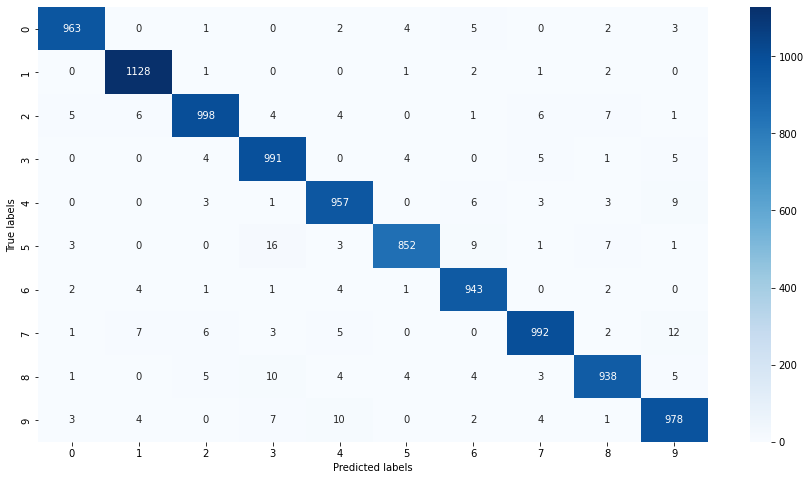

In [60]:
plt.figure(figsize=(15,8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap ='Blues')
plt.ylabel('True labels')
plt.xlabel('Predicted labels')

Predictive Model

In [ ]:
# input_image_path = input('Path of the image to be predicted: ')

# input_image = cv2.imread(input_image_path)

# cv2_imshow(input_image)

# grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

# input_image_resize = cv2.resize(grayscale, (28, 28))

# input_image_resize = input_image_resize/255

# image_reshaped = np.reshape(input_image_resize, [1,28,28])

# input_prediction = model.predict(image_reshaped)

# input_pred_label = np.argmax(input_prediction)

# print('The Handwritten Digit is recognised as ', input_pred_label)